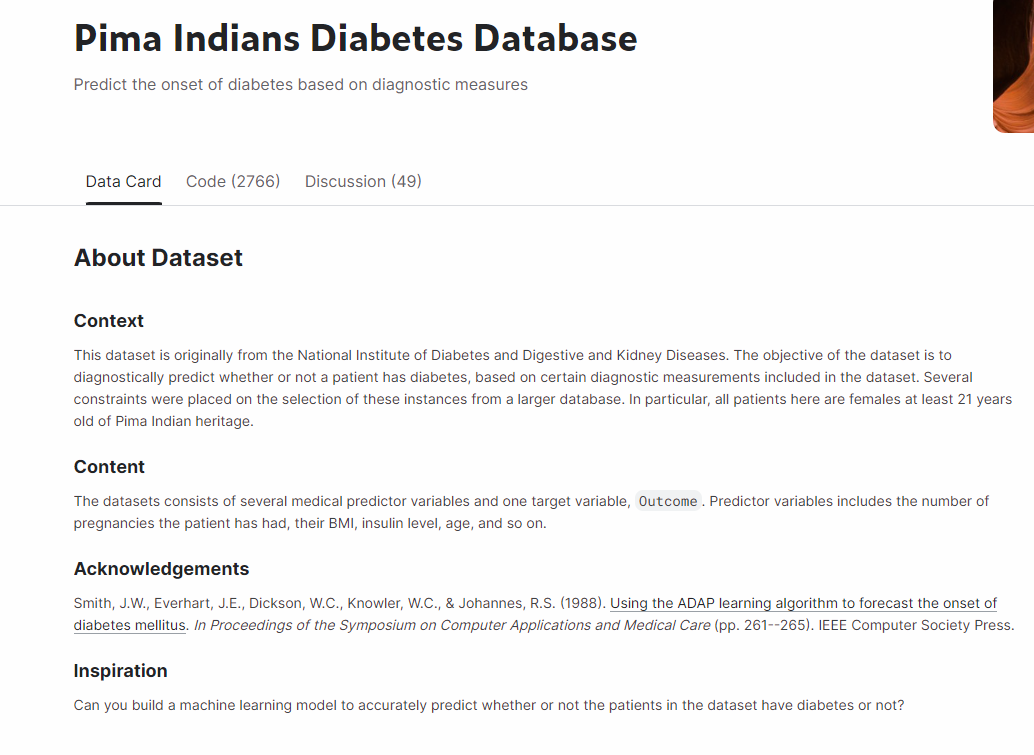

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings("ignore")

In [5]:
dataset = pd.read_csv("diabetes.csv")

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

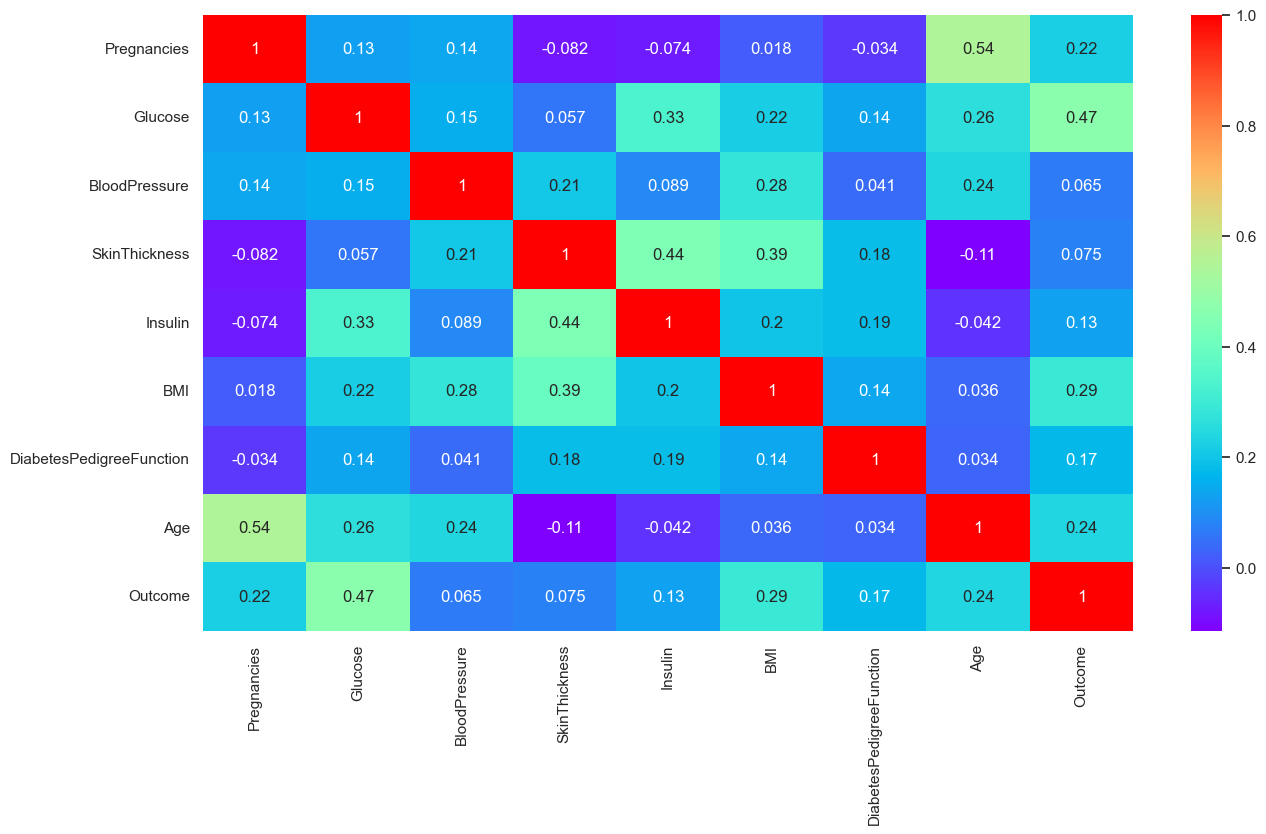

In [11]:
plt.figure(figsize=(15,8))
sns.heatmap(dataset.corr(), annot=True, cmap='rainbow')
plt.show()

In [13]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [15]:
dataset['Glucose'].value_counts()/len(dataset)*100

Glucose
99     2.213542
100    2.213542
111    1.822917
129    1.822917
125    1.822917
         ...   
191    0.130208
177    0.130208
44     0.130208
62     0.130208
190    0.130208
Name: count, Length: 136, dtype: float64

In [17]:
dataset['Glucose'] = np.where(dataset['Glucose']==0,117,dataset['Glucose'])

In [19]:
dataset['BloodPressure'] = np.where(dataset['BloodPressure']==0,72,dataset['BloodPressure'])
dataset['SkinThickness'] = np.where(dataset['SkinThickness']==0,23,dataset['SkinThickness'])
dataset['Insulin'] = np.where(dataset['Insulin']==0,30,dataset['Insulin'])
dataset['BMI'] = np.where(dataset['BMI']==0,32,dataset['BMI'])

In [21]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,27.334635,94.408854,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,9.229014,105.695978,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,30.000000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.000000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [23]:
# Split the data into ind variable and dep variable
x = dataset.iloc[:,0:-1]
y = dataset.iloc[:,-1]

In [25]:
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,30,33.6,0.627,50
1,1,85,66,29,30,26.6,0.351,31
2,8,183,64,23,30,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [27]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [29]:
# imblance to balance the data
import imblearn
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
x_sam, y_sam = ros.fit_resample(x,y)
print("original data :", y.value_counts())
print("After oversampling data :", y_sam.value_counts())

original data : Outcome
0    500
1    268
Name: count, dtype: int64
After oversampling data : Outcome
1    500
0    500
Name: count, dtype: int64


In [31]:
x_sam

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,30,33.6,0.627,50
1,1,85,66,29,30,26.6,0.351,31
2,8,183,64,23,30,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
995,4,144,82,32,30,38.5,0.554,37
996,1,113,64,35,30,33.6,0.543,21
997,4,109,64,44,99,34.8,0.905,26
998,9,184,85,15,30,30.0,1.213,49


In [33]:
y_sam

0      1
1      0
2      1
3      0
4      1
      ..
995    1
996    1
997    1
998    1
999    1
Name: Outcome, Length: 1000, dtype: int64

In [45]:
# Split the data into training and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_sam, y_sam, test_size=0.25,random_state=101,stratify=y_sam) 
# stratify means it will ensure to split the data for both (0 and 1) into train and test dataset

In [47]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


# Building Logistic Regression

In [49]:
from sklearn.linear_model import LogisticRegression
logit_model = LogisticRegression(multi_class='ovr')
logit_model.fit(x_train, y_train)

LogisticRegression(multi_class='ovr')

In [51]:
# Predict the model with train and test 

y_pred_train = logit_model.predict(x_train)
y_pred_test = logit_model.predict(x_test)

# Evaluation metrics

In [53]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [55]:
print(confusion_matrix(y_train, y_pred_train))
print(confusion_matrix(y_test, y_pred_test))

[[300  75]
 [ 97 278]]
[[101  24]
 [ 43  82]]


In [57]:
print(classification_report(y_train, y_pred_train))
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.76      0.80      0.78       375
           1       0.79      0.74      0.76       375

    accuracy                           0.77       750
   macro avg       0.77      0.77      0.77       750
weighted avg       0.77      0.77      0.77       750

              precision    recall  f1-score   support

           0       0.70      0.81      0.75       125
           1       0.77      0.66      0.71       125

    accuracy                           0.73       250
   macro avg       0.74      0.73      0.73       250
weighted avg       0.74      0.73      0.73       250



In [59]:
print("Training Accuracy Score", accuracy_score(y_train, y_pred_train))
print("Test Accuracy Score", accuracy_score(y_test, y_pred_test))

Training Accuracy Score 0.7706666666666667
Test Accuracy Score 0.732


In [ ]:
# AUC-ROC Curve
# K-Fold method
# EDA - dtale, pandas profilling, datapred, lux 

# K-Fold method

In [63]:
from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(logit_model, x_train, y_train, cv=10)
print(accuracy)
print(accuracy.mean())
print(accuracy.max())

[0.72       0.74666667 0.76       0.77333333 0.78666667 0.82666667
 0.69333333 0.82666667 0.70666667 0.77333333]
0.7613333333333333
0.8266666666666667


# ROC-AUC curve

In [67]:
from sklearn.metrics import roc_auc_score
logistic_roc_auc = roc_auc_score(y_test, y_pred_test)
logistic_roc_auc

0.7320000000000001

<Figure size 640x480 with 0 Axes>

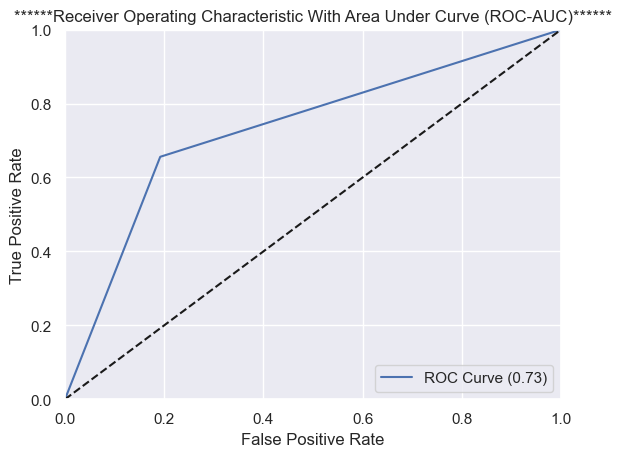

In [69]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)

plt.figure()
plt.plot(fpr, tpr, label="ROC Curve (%0.2f)" % logistic_roc_auc)
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("******Receiver Operating Characteristic With Area Under Curve (ROC-AUC)******")
plt.legend(loc='lower right')
plt.show()

In [ ]:
"""
import statsmodels.api as sm
from statsmodels.logistic.linear_model import OLS
from sklearn.linear_model import LogisticRegression

#logistic_model = sm.LogisticRegression()
#logistic_model.fit(x_train, y_train)
#logistic_model.summary()
"""